In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings 
warnings.simplefilter(action= 'ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score , GridSearchCV ,KFold, RandomizedSearchCV, train_test_split

import math
import sklearn.model_selection as ms 
import sklearn.metrics as sklm

### 1.EXPLORATORY DATA ANALYSIS
    a = train
    b = test
    c = combined

In [3]:
a = pd.read_csv("train.csv")

b = pd.read_csv("test.csv")

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
a.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print('The shape of our training set: %s houses and %s features'%(a.shape[0],a.shape[1]))
print('The shape of our training set: %s houses and %s features'%(b.shape[0],b.shape[1]))
print('The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  ')

The shape of our training set: 1460 houses and 81 features
The shape of our training set: 1459 houses and 80 features
The testing set has 1 feature less than the training set, which is SalePrice, the target to predict  


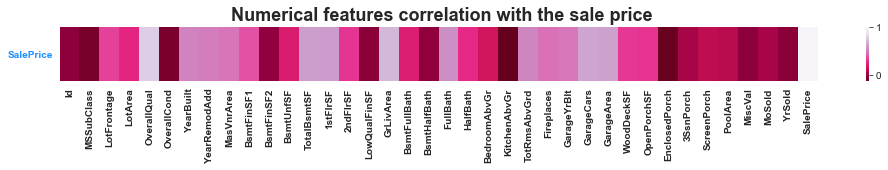

In [7]:
num=a.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='PuRd_r')
plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

In [9]:
Num = numcorr['SalePrice'].sort_values(ascending = False).head(10).to_frame()

cm = sns.light_palette("Red",as_cmap = True)
s = Num.style.background_gradient(cmap = cm) 

s

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


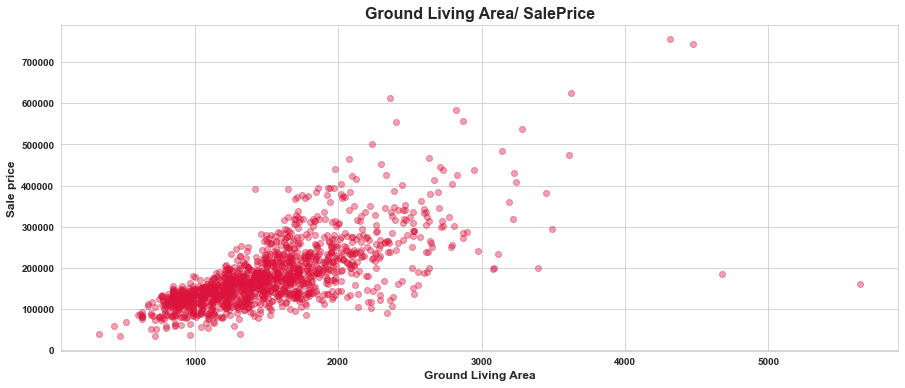

In [10]:
plt.figure(figsize = (15,6))
plt.scatter(x = a['GrLivArea'], y = a['SalePrice'], color = 'crimson',alpha = 0.4)

plt.title("Ground Living Area/ SalePrice",weight = 'bold', fontsize = 16)

plt.xlabel('Ground Living Area',weight = 'bold',fontsize = 12)
plt.ylabel('Sale price', weight='bold', fontsize=12)

plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')

plt.show()

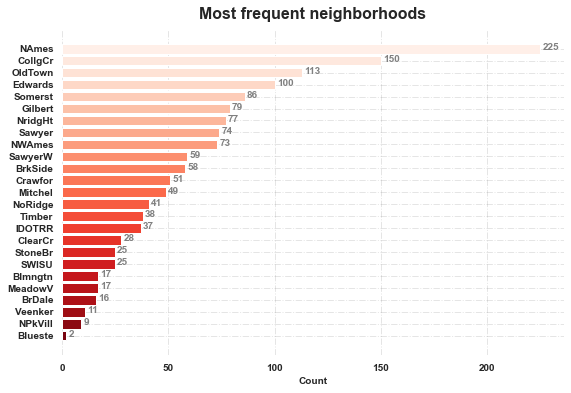

In [11]:
fig, ax = plt.subplots(figsize = (9,6))

title_cnt = a.Neighborhood.value_counts().sort_values(ascending = False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Reds',len(title_cnt)))

for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')   

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)

ax.grid(b = True,color = 'grey',linestyle = "-.",linewidth=1, alpha = 0.2)

ax.invert_yaxis()

# Add Plot Title
ax.set_title('Most frequent neighborhoods',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')


plt.show()

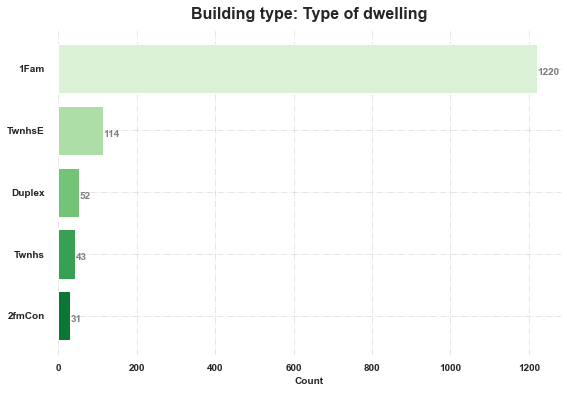

In [12]:
fig, ax = plt.subplots(figsize = (9,6))

title_cnt = a.BldgType.value_counts().sort_values(ascending = False).reset_index()

mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Greens',len(title_cnt)))

for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')  

ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Building type: Type of dwelling',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')


plt.show()

In [13]:
na = a.shape[0]
nb = b.shape[0]

y_train = a['SalePrice'].to_frame()

c1 = pd.concat((a,b),sort=False).reset_index(drop = True)

c1.drop(['SalePrice'],axis =1, inplace = True)
c1.drop(['Id'],axis = 1, inplace = True)
print(f"Shape of combined data set is {c1.shape}")

Shape of combined data set is (2919, 79)


# 2.DATA CLEANING

In [88]:
def msv1(data, thresh = 20 ,color = 'black', edgecolor = 'black', width = 15,  height = 3):
    plt.figure(figsize = (width,height))
    
    percentage = (data.isnull().mean())*100
    
    percentage.sort_values(ascending = False).plot.bar(color = color,edgecolor = edgecolor)

    plt.axhline(y = thresh, color = 'r' , linestyle = '-')

    plt.title('Missing values percent per column',fontsize = 20, weight = 'bold')

    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh} missing values', fontsize=12, color='green',
         ha='left' ,va='top')     

    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()    

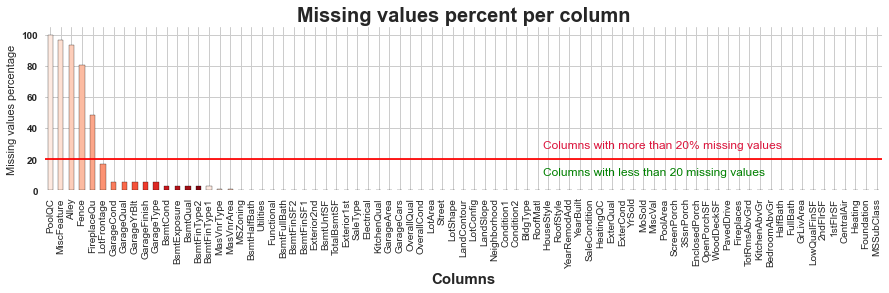

In [89]:
msv1(c1, 20 , color = sns.color_palette("Reds",15))

In [14]:
c=c1.dropna(thresh=len(c1)*0.8, axis=1)
print(f"We dropped {c1.shape[1]-c.shape[1]} features in the combined set")

We dropped 5 features in the combined set


In [91]:
allna = (c.isnull().sum()/len(c))*100
allna = allna.drop(allna[allna == 0].index).sort_values()

def msv2(data, width=12, height=8, color=('silver', 'gold','lightgreen','skyblue','lightpink'), edgecolor='black'):
    fig, ax = plt.subplots(figsize=(width, height))

    allna = (data.isnull().sum() / len(data))*100
    tightout= 0.008*max(allna)
    allna = allna.drop(allna[allna == 0].index).sort_values().reset_index()
    mn= ax.barh(allna.iloc[:,0], allna.iloc[:,1], color=color, edgecolor=edgecolor)
    ax.set_title('Missing values percentage per column', fontsize=15, weight='bold' )
    ax.set_xlabel('Percentage', weight='bold', size=15)
    ax.set_ylabel('Features with missing values', weight='bold')
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    for i in ax.patches:
        ax.text(i.get_width()+ tightout, i.get_y()+0.1, str(round((i.get_width()), 2))+'%',
            fontsize=10, fontweight='bold', color='grey')
    return plt.show()

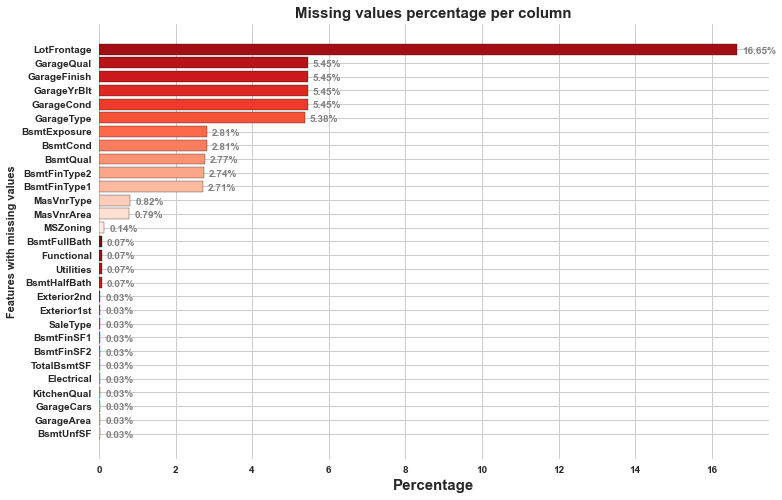

In [92]:
msv2(c,color=sns.color_palette('Reds',15))

In [93]:
print(f'The shape of the combined dataset after dropping features with more than 80% M.V. {c.shape}')

The shape of the combined dataset after dropping features with more than 80% M.V. (2919, 74)


In [94]:
NA  = c[allna.index.to_list()]

## 2.1 NUMERICAL FEATURE

In [95]:
NAcat = NA.select_dtypes(include = 'object')
NAnum = NA.select_dtypes(exclude = 'object')

print(f"We have :{NAcat.shape[1] } categorical feature with missing values")
print(f"We have :{NAnum.shape[1] } numerical feature with missing values")

We have :18 categorical feature with missing values
We have :11 numerical feature with missing values


In [96]:
NAnum.head()

,BsmtUnfSF,GarageArea,GarageCars,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtHalfBath,BsmtFullBath,MasVnrArea,GarageYrBlt,LotFrontage
0,150.0,548.0,2.0,856.0,0.0,706.0,0.0,1.0,196.0,2003.0,65.0
1,284.0,460.0,2.0,1262.0,0.0,978.0,1.0,0.0,0.0,1976.0,80.0
2,434.0,608.0,2.0,920.0,0.0,486.0,0.0,1.0,162.0,2001.0,68.0
3,540.0,642.0,3.0,756.0,0.0,216.0,0.0,1.0,0.0,1998.0,60.0
4,490.0,836.0,3.0,1145.0,0.0,655.0,0.0,1.0,350.0,2000.0,84.0


In [97]:
c['MasVnrArea'] = c.MasVnrArea.fillna(0)

c['LotFrontage'] = c.LotFrontage.fillna(c.LotFrontage.median())

c['GarageYrBlt'] = c['GarageYrBlt'].fillna(1980)

## 2.2 CATEGORICAL FEATURE

In [98]:
NAcat.head()

,KitchenQual,Electrical,SaleType,Exterior1st,Exterior2nd,Utilities,Functional,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond,BsmtExposure,GarageType,GarageCond,GarageFinish,GarageQual
0,Gd,SBrkr,WD,VinylSd,VinylSd,AllPub,Typ,RL,BrkFace,GLQ,Unf,Gd,TA,No,Attchd,TA,RFn,TA
1,TA,SBrkr,WD,MetalSd,MetalSd,AllPub,Typ,RL,None,ALQ,Unf,Gd,TA,Gd,Attchd,TA,RFn,TA
2,Gd,SBrkr,WD,VinylSd,VinylSd,AllPub,Typ,RL,BrkFace,GLQ,Unf,Gd,TA,Mn,Attchd,TA,RFn,TA
3,Gd,SBrkr,WD,Wd Sdng,Wd Shng,AllPub,Typ,RL,None,ALQ,Unf,TA,Gd,No,Detchd,TA,Unf,TA
4,Gd,SBrkr,WD,VinylSd,VinylSd,AllPub,Typ,RL,BrkFace,GLQ,Unf,Gd,TA,Av,Attchd,TA,RFn,TA


In [99]:
NAcat1 = NAcat.isnull().sum().to_frame().sort_values(by=[0]).T

cm = sns.light_palette("Lime", as_cmap = True)

NAcat1 =  NAcat1.style.background_gradient(cmap = cm)
NAcat1 

,KitchenQual,Electrical,SaleType,Exterior1st,Exterior2nd,Utilities,Functional,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond,BsmtExposure,GarageType,GarageCond,GarageFinish,GarageQual
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


In [100]:
ffill_cols = ['Electrical', 'SaleType', 'KitchenQual', 'Exterior1st',
             'Exterior2nd', 'Functional', 'Utilities', 'MSZoning']

def filling_NA(data, columns, METHOD='ffill'):
    fill_cols = columns
    
    for col in data[fill_cols]:
        data[col]= data[col].fillna(method=METHOD)
    
    return data

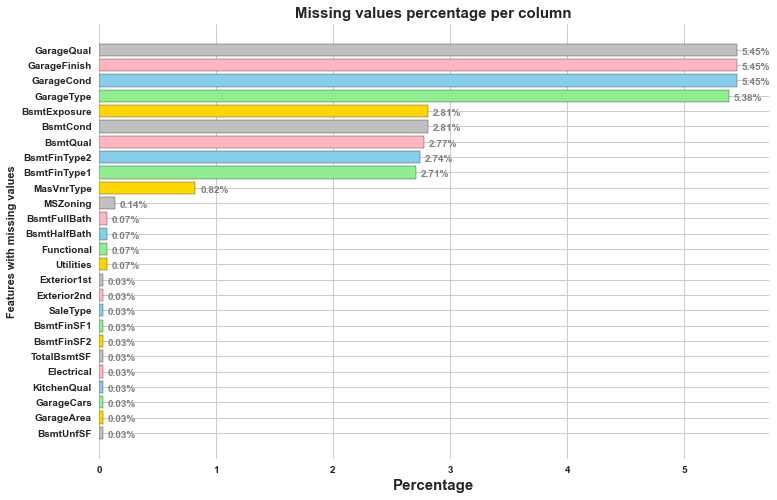

In [101]:
msv2(c)

In [102]:
d = filling_NA(c,ffill_cols)

In [103]:
fill_cols = ['Electrical', 'SaleType', 'KitchenQual', 'Exterior1st',
             'Exterior2nd', 'Functional', 'Utilities', 'MSZoning']
for col in c[fill_cols]:
    c[col] = c[col].fillna(method='ffill')

In [104]:
NAcols=c.columns
for col in NAcols:
    if c[col].dtype == "object":
        c[col] = c[col].fillna("None")

In [105]:
for col in NAcols:
    if c[col].dtype != "object":
        c[col]= c[col].fillna(0)

In [106]:
c.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

##  3. FEATURE ENGINEERING

In [107]:
c['TotalArea'] = c['TotalBsmtSF'] + c['1stFlrSF'] + c['2ndFlrSF'] + c['GrLivArea'] +c['GarageArea']

c['Bathrooms'] = c['FullBath'] + c['HalfBath']*0.5 

c['Year average']= (c['YearRemodAdd']+c['YearBuilt'])/2

## 4.ENCODING CATEGORICAL VARIABLE

### 4.1 NUMERICAL FEATURE

In [108]:
c['MSSubClass'] = c['MSSubClass'].apply(str)
c['YrSold'] = c['YrSold'].astype(str)

### 4.2 ONE HOT ENCODING

In [109]:
cb=pd.get_dummies(c)
print(f"the shape of the original dataset {c.shape}")
print(f"the shape of the encoded dataset {cb.shape}")
print(f"We have {cb.shape[1]- c.shape[1]} new encoded features")


the shape of the original dataset (2919, 77)
the shape of the encoded dataset (2919, 301)
We have 224 new encoded features


In [110]:
Train = cb[:na]  #na is the number of rows of the original training set
Test = cb[na:] 


## 5.OUTLIERS DETECTION

### 5.1 OUTLIER VISUALIZATION

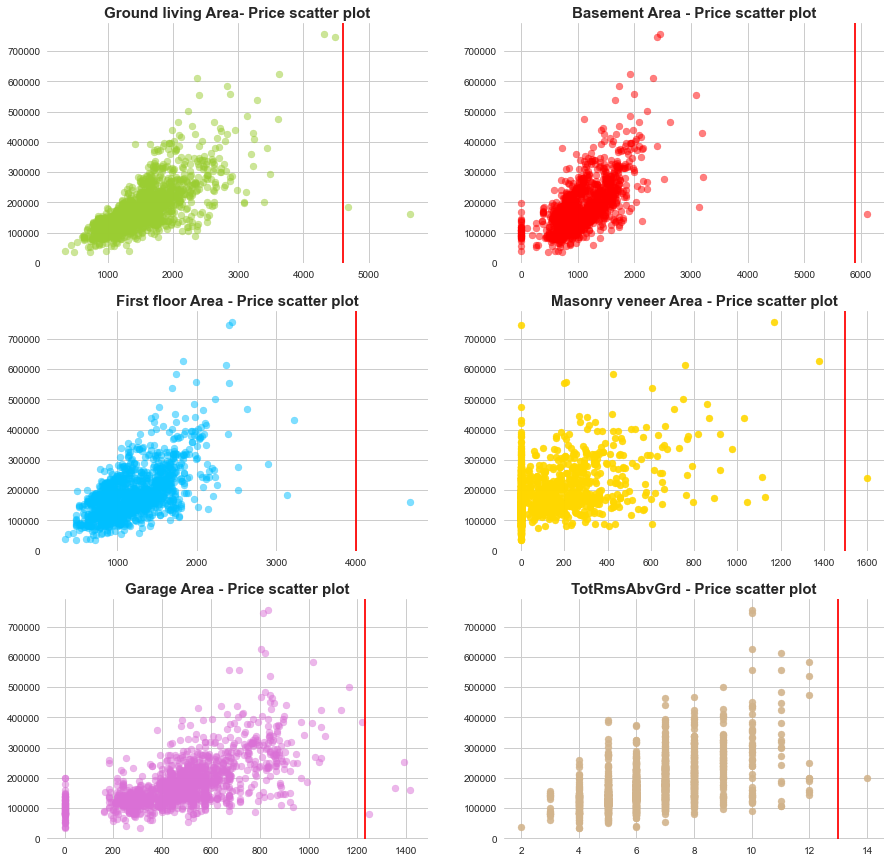

In [111]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=a['TotalBsmtSF'], y=a['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=a['1stFlrSF'], y=a['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=a['MasVnrArea'], y=a['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=a['GarageArea'], y=a['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=a['TotRmsAbvGrd'], y=a['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )
plt.show()

In [112]:
a['GrLivArea'].sort_values(ascending=False).head(2)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [113]:
a['TotalBsmtSF'].sort_values(ascending=False).head(1)

1298    6110
Name: TotalBsmtSF, dtype: int64

In [114]:
a['MasVnrArea'].sort_values(ascending=False).head(1)

297    1600.0
Name: MasVnrArea, dtype: float64

In [115]:
a['GarageArea'].sort_values(ascending=False).head(4)

1298    1418
581     1390
1190    1356
1061    1248
Name: GarageArea, dtype: int64

In [116]:
a['TotRmsAbvGrd'].sort_values(ascending=False).head(1)

635    14
Name: TotRmsAbvGrd, dtype: int64

In [117]:
train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500)]

print(f'We removed {Train.shape[0]- train.shape[0]} outliers')

We removed 3 outliers


In [118]:
target=a[['SalePrice']]
target.loc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [119]:
target.loc[523]

SalePrice    184750
Name: 523, dtype: int64

In [120]:
pos = [1298,523, 297]
target.drop(target.index[pos], inplace=True)

In [121]:
print('We make sure that both train and target sets have the same row number after removing the outliers:')
print( 'Train: ',train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

We make sure that both train and target sets have the same row number after removing the outliers:
Train:  1457 rows
Target: 1457 rows


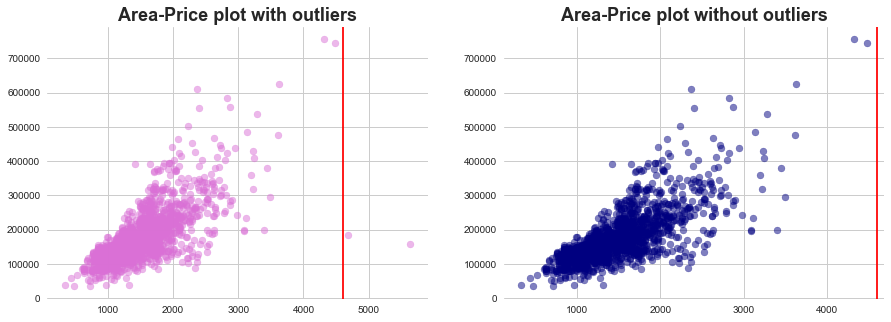

In [122]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('orchid'), alpha=0.5)
plt.title('Area-Price plot with outliers',weight='bold', fontsize=18)
plt.axvline(x=4600, color='r', linestyle='-')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.scatter(x=train['GrLivArea'], y=target['SalePrice'], color='navy', alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Area-Price plot without outliers',weight='bold', fontsize=18)
plt.show()

### LOG TRANSFORMATION OF SKEWED NUMERICAL FEATURE

In [123]:
print("Skewness before log transform: ", a['GrLivArea'].skew())
print("Kurtosis before log transform: ", a['GrLivArea'].kurt())

Skewness before log transform:  1.3665603560164552
Kurtosis before log transform:  4.895120580693174


In [124]:
from scipy.stats import skew

In [125]:
print(f"Skewness after log transform: {train['GrLivArea'].skew()}")
print(f"Kurtosis after log transform: {train['GrLivArea'].kurt()}")

Skewness after log transform: 1.0127645385480262
Kurtosis after log transform: 2.0672339304153655


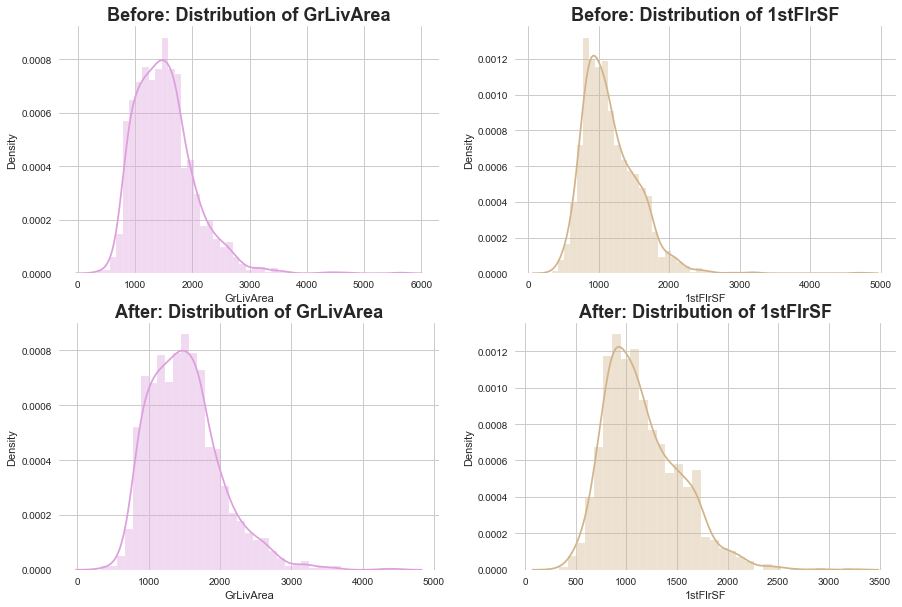

In [126]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,10))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(a.GrLivArea, color='plum')
plt.title('Before: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(0,1))
sns.distplot(a['1stFlrSF'], color='tan')
plt.title('Before: Distribution of 1stFlrSF',weight='bold', fontsize=18)


ax1 = plt.subplot2grid((2,2),(1,0))
sns.distplot(train.GrLivArea, color='plum')
plt.title('After: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(1,1))
sns.distplot(train['1stFlrSF'], color='tan')
plt.title('After: Distribution of 1stFlrSF',weight='bold', fontsize=18)
plt.show()

In [127]:
print(f"Skewness before log transform: {target['SalePrice'].skew()}")
print(f"Kurtosis before log transform: {target['SalePrice'].kurt()}")

Skewness before log transform: 1.8829247000823222
Kurtosis before log transform: 6.527120338179705


In [128]:
target["SalePrice"] = np.log1p(target["SalePrice"])

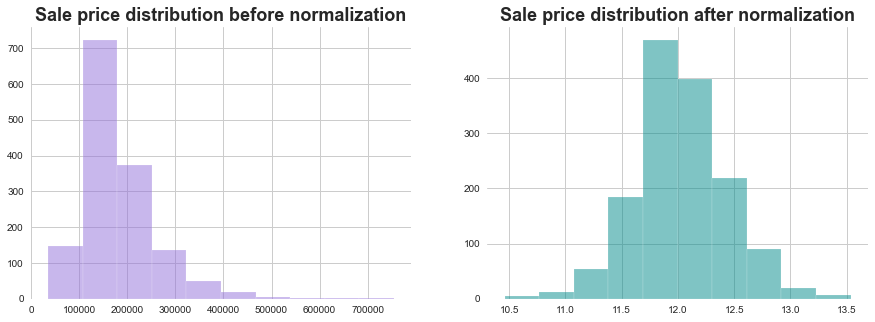

In [129]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(a.SalePrice, bins=10, color='mediumpurple',alpha=0.5)
plt.title('Sale price distribution before normalization',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(target.SalePrice, bins=10, color='darkcyan',alpha=0.5)
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)
plt.show()

## 6.MACHINE LEARNING

### 6.1 : PREPROCESSING

In [130]:
x=train
y=np.array(target)

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)

In [132]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
#Transform the test set
X_test= scaler.transform(Test)

### 6.2: LINEAR REGRESSION

In [133]:
from sklearn.linear_model import LinearRegression

lreg=LinearRegression()
MSEs=ms.cross_val_score(lreg, x, y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))

-26565284.557832126
RMSE = 5154.152166732384


In [134]:
def score(y_pred):
    return str(math.sqrt(sklm.mean_squared_error(y_test, y_pred)))

## RIDGE REGRESSION

In [135]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print(f"The best value of Alpha is: {ridge_reg.best_params_}")
print(f"The best score achieved with Alpha=11 is: {math.sqrt(-ridge_reg.best_score_)}")
ridge_pred=math.sqrt(-ridge_reg.best_score_)

The best value of Alpha is: {'alpha': 21}
The best score achieved with Alpha=11 is: 0.1150975462847769


In [136]:
ridge_mod=Ridge(alpha=15)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print(f'Root Mean Square Error train =  {str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train)))}')
print(f'Root Mean Square Error test =  {score(y_pred_test)}') 

Root Mean Square Error train =  0.09358592359652476
Root Mean Square Error test =  0.11462519502116077


## CROSS VALIDATION

In [137]:
#Ridge regression
Ridge_CV=Ridge(alpha=15)
MSEs=ms.cross_val_score(Ridge_CV, x, y, scoring='neg_mean_squared_error', cv=5)

#RMSE score of the 5 folds
print("RMSE scores of the 5 folds:")
for i,j in enumerate(MSEs):
    j= math.sqrt(np.mean(-j))
    print(f'Fold {i}: {round(j,4)}')

#Final RMSE score with Lasso
print(f'Mean RMSE with Ridge: {round(math.sqrt(np.mean(-MSEs)),4)}')

RMSE scores of the 5 folds:
Fold 0: 0.1101
Fold 1: 0.1194
Fold 2: 0.1208
Fold 3: 0.104
Fold 4: 0.1121
Mean RMSE with Ridge: 0.1134


## LASSO REGRESSION


In [138]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}


lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print(f'The best value of Alpha is: {lasso_reg.best_params_}')

The best value of Alpha is: {'alpha': 0.0009}


In [139]:
lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print(f'Root Mean Square Error train  {str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train)))}')
print(f'Root Mean Square Error test  {score(y_lasso_test)}')

Root Mean Square Error train  0.0994713946919462
Root Mean Square Error test  0.11164538594890569


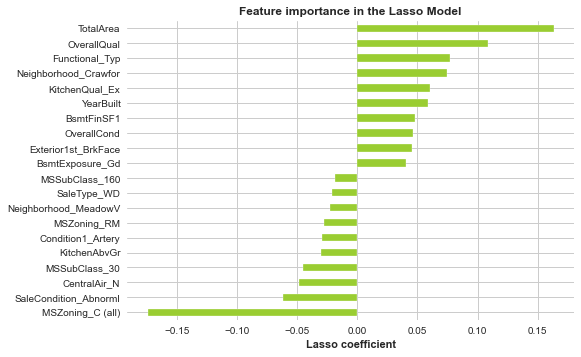

In [140]:
coefs = pd.Series(lasso_mod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [141]:
print(f"Lasso kept {sum(coefs != 0)} important features and dropped the other  {sum(coefs == 0)} features")

Lasso kept 87 important features and dropped the other  214 features


In [142]:
Lasso_CV=Lasso(alpha=0.0009)
MSEs=ms.cross_val_score(Lasso_CV, x, y, scoring='neg_mean_squared_error', cv=5)

#RMSE score of the 5 folds
print("RMSE scores of the 5 folds:")
for i,j in enumerate(MSEs):
    j= math.sqrt(np.mean(-j))
    print(f'Fold {i}: {round(j,4)}')

#Final RMSE score with Lasso
print(f'Mean RMSE with Lasso: {round(math.sqrt(np.mean(-MSEs)),4)}')

RMSE scores of the 5 folds:
Fold 0: 0.1081
Fold 1: 0.1179
Fold 2: 0.1205
Fold 3: 0.1032
Fold 4: 0.1107
Mean RMSE with Lasso: 0.1123


## ELASTIC NET CV

In [143]:
from sklearn.linear_model import ElasticNetCV

alphas = [0.000542555]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print(f'Root Mean Square Error test = {score(ela_pred)}')
print(elastic_cv.alpha_)
print(elastic_cv.l1_ratio_)

Root Mean Square Error test = 0.1121763302391026
0.000542555
0.9


In [144]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print(f'Root Mean Square Error test = {score(vote_pred)}')

Root Mean Square Error test = 0.11218349498464042


In [145]:
final_test=(0.3*vote_pred+ 0.2*y_lasso_test)
print(f'Root Mean Square Error test=  {score(final_test)}')

Root Mean Square Error test=  6.031039414942223


In [146]:
#VotingRegressor to predict the final Test
vote_test = vote_mod.predict(X_test)
final1=np.expm1(vote_test)



#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(X_test)
final3=np.expm1(lasso_test)

In [147]:

final=(0.2*final1+0.2*final3)

final_submission = pd.DataFrame({
        "Id": b["Id"],
        "SalePrice": final
    })
final_submission.to_csv("final_submission.csv", index=False)
final_submission.head()

,Id,SalePrice
0,1461,47424.464499
1,1462,60554.002784
2,1463,71645.576323
3,1464,79678.703085
4,1465,75098.858481
